<a href="https://colab.research.google.com/github/kemboivictor/Diabetes-Heart-disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries and common modules for heart_df anlysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
heart_df=pd.read_csv("/content/heart.csv")

In [3]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
#summary of the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.shape

(918, 12)

In [7]:
heart_df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
564,57,M,ASY,144,270,1,ST,160,Y,2.0,Flat,1
611,62,M,TA,135,139,0,ST,137,N,0.2,Up,0
651,61,M,ASY,140,207,0,LVH,138,Y,1.9,Up,1
849,62,M,NAP,130,231,0,Normal,146,N,1.8,Flat,0
20,43,F,TA,100,223,0,Normal,142,N,0.0,Up,0


In [8]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
#All columns irrespective of data type
heart_df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [10]:
#heart_df Preprocessing
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [11]:
#checking for duplicates
heart_df.duplicated().sum()

np.int64(0)

In [12]:
heart_df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


1-> Defective Heart
0->Healthy Heart
but since it is not 50/50 ,it is imbalance heart_df

In [13]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
#getting the categorical features(object in nature) from the heart_df and separating them
cat_col = heart_df.select_dtypes(include='object').columns

#example of object values in chest pain
heart_df['ChestPainType'].unique()

In [15]:
# now there is a range to work on
range(heart_df['ChestPainType'].nunique())

range(0, 4)

because of object nature, they are converted to numeric\:

sex: M = 0, F = 1

sp: ATA = 0, NAP = 1, ASY = 2, TA = 3

trestbps: Normal = 0, ST = 1, LVH = 2

exang: N = 0, Y = 1

Slope: Up = 0, Flat = 1, Down = 2

In [16]:
#working on the categorical features/ values in each column
for col in cat_col:
    print(col)
    print((heart_df[col].unique()), list(range(heart_df[col].nunique())))
    heart_df[col].replace((heart_df[col].unique()), range(heart_df[col].nunique()), inplace=True)
    print('*'*90)
    print()

Sex
['M' 'F'] [0, 1]
******************************************************************************************

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
******************************************************************************************

RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
******************************************************************************************

ExerciseAngina
['N' 'Y'] [0, 1]
******************************************************************************************

ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
******************************************************************************************



In [17]:
#now we do not have categorical values but numerical values for the data
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [18]:
#no patient can have 0 cholestral and Blood pressures
heart_df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [19]:
#employ KNN imputer to sort out the zero values for cholestrol
heart_df['Cholesterol'].replace(0, np.nan, inplace=True)

In [20]:
#replacing the missing values using KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_imputer = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_imputer, columns=heart_df.columns)

In [21]:
heart_df['Cholesterol'].isnull().sum()

np.int64(0)

In [22]:
count = 0
for i in heart_df['Cholesterol']:
    if i==0:
        count+=1
print(count)

0


In [23]:
#on to the samefor resting blood pressure
heart_df['RestingBP'][heart_df['RestingBP'] ==0]

,RestingBP
449,0.0


In [24]:
#replacing the missing value using KNN
from sklearn.impute import KNNImputer
heart_df['RestingBP'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_imputer = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_imputer, columns=heart_df.columns)

In [25]:
heart_df['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 190., 135., 180.,
       108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,  95.,
        80., 137., 185., 165., 126., 152., 116., 144., 154., 134., 104.,
       139., 131., 141., 178., 146., 158., 123., 102.,  96., 143., 172.,
       156., 114., 127., 101., 174.,  94., 148., 117., 192., 129., 164.])

In [26]:
heart_df['Cholesterol'].isnull().sum()

np.int64(0)

need to change the columns type to int, ie Oldpeak is in float

In [27]:
withoutOldPeak = heart_df.columns
withoutOldPeak = withoutOldPeak.drop('Oldpeak')
heart_df[withoutOldPeak] = heart_df[withoutOldPeak].astype(int)

In [28]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


DATA VISUALIZATION

In [29]:
import  plotly.express as px

In [30]:
#finding relation and correlation among various columns in the dataset
heart_df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.214164,0.263128,0.057108,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.179766,-0.009658,0.080395,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.214164,-0.179766,1.000000,0.073016,0.038855,0.155111,0.112067,-0.273076,0.324049,0.300846,0.352364,0.459017
RestingBP,0.263128,-0.009658,0.073016,1.000000,0.113194,0.067556,0.094144,-0.109329,0.152621,0.174464,0.082401,0.118333
Cholesterol,0.057108,0.080395,0.038855,0.113194,1.000000,0.058798,0.074925,-0.028855,0.083761,0.065988,0.071345,0.101263
FastingBS,0.198039,-0.120076,0.155111,0.067556,0.058798,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.112067,0.094144,0.074925,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.273076,-0.109329,-0.028855,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.324049,0.152621,0.083761,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.300846,0.174464,0.065988,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


In [31]:
heart_df.corr()['HeartDisease'] [:-1].sort_values()

,HeartDisease
MaxHR,-0.400421
Sex,-0.305445
RestingECG,0.061011
Cholesterol,0.101263
RestingBP,0.118333
FastingBS,0.267291
Age,0.282039
Oldpeak,0.403951
ChestPainType,0.459017
ExerciseAngina,0.494282


In [32]:
#using a line chart
px.line(heart_df.corr()['HeartDisease'] [:-1].sort_values())

Percentage of HeartDisease data distribution

In [33]:
#Plotted on a pie chart
px.pie(heart_df, names='HeartDisease', title='Percentage of HeartDisease data distribution')

Age and HeartDisease Distribution

In [34]:
px.sunburst(heart_df,path=['HeartDisease', 'Age'])

Age and HeartDisease distribution on a histogram

In [35]:
px.histogram(heart_df, x='Age', color='HeartDisease')

Sex vs HeartDisease distribution

In [36]:
px.histogram(heart_df, x='Sex', color='HeartDisease')

ChestPainType vs HeartDisease

In [37]:
#Empoying a histogram to show distribution
px.histogram(heart_df, x='ChestPainType', color='HeartDisease')
#chestPainType : ATA = 0, NAP = 1, ASY = 2, TA =3

RestingBP vs HeartDisease Distribution

In [38]:
#using sunburst graph
px.sunburst(heart_df, path=['HeartDisease', 'RestingBP'])

FastingBS vs HeartDisease Distribution

In [39]:
#Employing a histogram for the distribution
px.histogram(heart_df, x='FastingBS', color='HeartDisease')

MaxHR vs HeartDisease distribution

In [40]:
#employing sunburst graph
px.sunburst(heart_df, path=['HeartDisease', 'MaxHR'])

In [41]:
#employing violin plot for MaxHR vs HeartDisease
px.violin(heart_df, x='HeartDisease', y='MaxHR', color='HeartDisease')

Oldpeak vs HeartDisease distribution

In [42]:
#employing violin graph
px.violin(heart_df, x='HeartDisease', y='Oldpeak', color='HeartDisease')

ST_Slope vs HeartDisease distribution

In [43]:
#employing a histogram
px.histogram(heart_df, x='ST_Slope', color='HeartDisease')

ExerciseAngina vs Heartdisease distribution

In [44]:
#employing a histogram for this
px.histogram(heart_df, x='ExerciseAngina', color='HeartDisease')

Dataset Modelling

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X=heart_df.drop(columns='HeartDisease', axis=1)
y=heart_df['HeartDisease']

In [47]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,0
1,49,1,1,160,180,0,0,156,0,1.0,1
2,37,0,0,130,283,0,1,98,0,0.0,0
3,48,1,2,138,214,0,0,108,1,1.5,1
4,54,0,1,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1
914,68,0,2,144,193,1,0,141,0,3.4,1
915,57,0,2,130,131,0,0,115,1,1.2,1
916,57,1,0,130,236,0,2,174,0,0.0,1


In [48]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
X_train.shape

(734, 11)

In [51]:
y_train.shape

(734,)

MODEL TRAINING

LOGISTIC REGRESSION i.e for binary classificaton which is the case for this dataset

In [56]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver  =  ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_solver = ''
test_score = np.zeros(6)

#for loop is used to loop over all solvers
for i, n in enumerate(solver):
  lr = LogisticRegression(solver = n).fit(X_train, y_train)
  test_score[i] = lr.score(X_test, y_test)
  if lr.score(X_test, y_test) == test_score.max():
    best_solver = n
    best_score = test_score.max()

print(best_solver)
lr = LogisticRegression(solver=best_solver)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')
log_reg_acc = accuracy_score(y_test, lr_pred)



newton-cholesky
LogisticRegression Score: 0.8586956521739131


SUPPORT VECTOR MACHINE(SVM)

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear' :0, 'poly' :0, 'rbf' :0, 'sigmoid' : 0}
best  = ' '
for i in kernels:
  svm = SVC(kernel=i)
  svm.fit(X_train, y_train)
  yhat = svm.predict(X_test)
  kernels[i] = f1_score(y_test, yhat, average = "weighted")
  if kernels[i] == max(kernels.values()):
    best = i

svm = SVC(kernel=best)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(f'SVM f1_score kernel({best}): {f1_score(y_test, svm_pred, average="weighted")}')
svc_acc = f1_score(y_test, svm_pred, average="weighted")

SVM f1_score kernel(linear): 0.8422922535440344


DECISION TREE CLASSIFIER

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTree's Accuracy :", accuracy_score(y_test, dtc_pred))
dt_acc = accuracy_score(y_test, dtc_pred)

DecisionTree's Accuracy : 0.8097826086956522


RANDOM FOREST CLASSIFIER

In [59]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_features': ['sqrt', 'log2', 'None'],
    'max_depth': [3, 6, 9, 19],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(X_train, y_train)
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(X_train, y_train)
rfc_pred = rfctree.predict(X_test)
print("RandomForestclassifier's Accuracy: ", accuracy_score(y_test,rfc_pred))
rand_acc = accuracy_score(y_test,rfc_pred)


RandomForestclassifier's Accuracy:  0.842391304347826


Model comparison to pick out the best model

In [60]:
# Model Comparison of the models, to pick out the bestt
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4),  100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,85.87
3,Random Forest Classifier,84.24
1,SVM,84.23
2,Decision Tree Classifier,80.98


Saving the model

In [61]:
import pickle
model = log_reg_acc
pickle.dump(model, open("heart.pkl",'wb'))


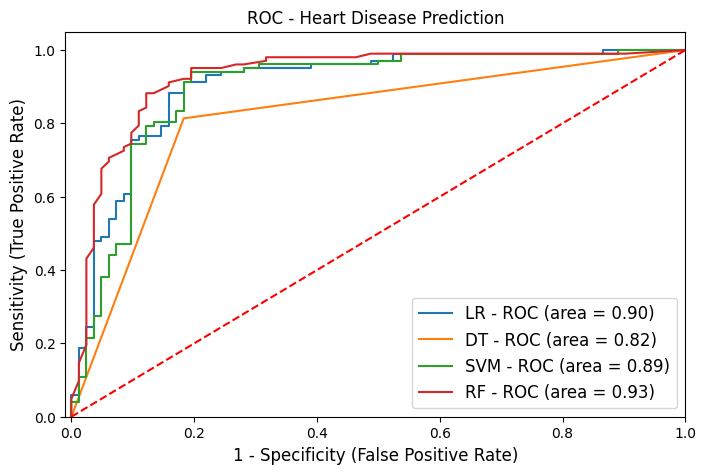

In [71]:
# Plotting the ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
models = [
    {
        'label': 'LR',
        'model': lr,
    },
    {
        'label': 'DT',
        'model': dtree,
    },
    {
        'label': 'SVM',
        'model': svm,
    },
    {
        'label': 'RF',
        'model': rfc,
    },
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if the model has predict_proba or use decision_function
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    # Calculate ROC curve and AUC
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_proba)
    auc = metrics.roc_auc_score(y_test, y_proba)
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


PERFORMANCE EVALUATION

Accuracies: [85.87, 80.97999999999999, 84.23, 84.24000000000001]
ROC AUC Scores: [np.float64(90.38000000000001), np.float64(83.62), np.float64(89.42999999999999), np.float64(92.72)]


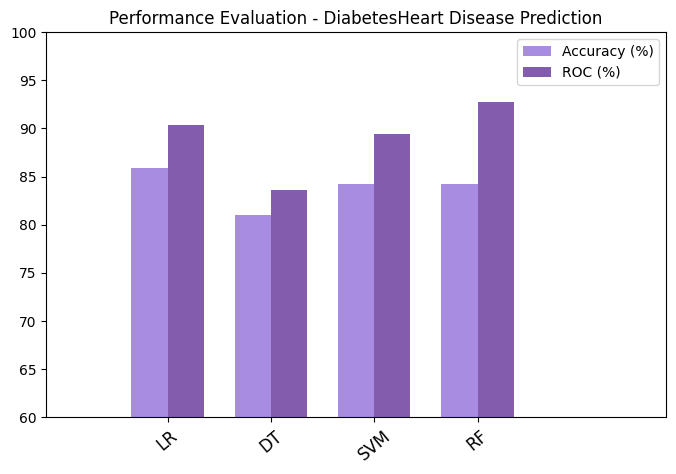

In [72]:
# Performance evaluation of the models
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = [
    {
        'label': 'LR',
        'model': lr,
    },
    {
        'label': 'DT',
        'model': dtree,
    },
    {
        'label': 'SVM',
        'model': svm,
    },
    {
        'label': 'RF',
        'model': rfc,
    },
]

means_roc = []
# Fixing the order of accuracies to match model list
means_accuracy = [
    100 * round(log_reg_acc, 4),
    100 * round(dt_acc, 4),
    100 * round(svc_acc, 4),
    100 * round(rand_acc, 4),
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Handling predict_proba() or decision_function()
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
        fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_proba)
        auc = metrics.roc_auc_score(y_test, y_proba)
    except:
        auc = metrics.roc_auc_score(y_test, y_pred)  # Fallback if no probability scores

    auc = 100 * round(auc, 4)
    means_roc.append(auc)

print("Accuracies:", means_accuracy)
print("ROC AUC Scores:", means_roc)

# Data to plot
n_groups = 4  # Fix: Set to the correct number of models
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                 alpha=opacity,
                 color='rebeccapurple',
                 label='ROC (%)')

plt.xlim([-1, 5])  # Adjusted x-axis limit to match the number of models
plt.ylim([60, 100])  # Made the upper limit 100 for a better scale

plt.title('Performance Evaluation - DiabetesHeart Disease Prediction', fontsize=12)
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'SVM', 'RF'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
